In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [23]:
dataset = pd.read_csv('/Users/noeltiju/Desktop/ML-Project/ELO-Insights/training_dataset.csv')

# Reset the index to convert the MultiIndex into columns
dataset = dataset.reset_index()

col_names = ['Home_Team_Rating', 'Away_Team_Rating', 'Winner']

dataset = dataset[col_names]
print(dataset.head())

   Home_Team_Rating  Away_Team_Rating  Winner
0              1516              1484       1
1              1516              1484       1
2              1516              1484       1
3              1500              1500       0
4              1484              1516      -1


In [24]:
features = ['Home_Team_Rating', 'Away_Team_Rating']
target = 'Winner'

X = dataset[features]
y = dataset[target]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

label_map = {1: 2, 0: 1, -1: 0}
y_train_mapped = y_train.map(label_map)
y_test_mapped = y_test.map(label_map)

In [26]:
dtrain_reg = xgb.DMatrix(X_train, label=y_train_mapped, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, label=y_test_mapped, enable_categorical=True)


In [27]:
params = {"objective": "multi:softmax", "num_class": 3, "tree_method": "hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = model.predict(dtest_reg)

rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

mae = mean_absolute_error(y_test, preds)
print(f"MAE: {mae:.2f}")

RMSE of the base model: 1.464
MAE: 1.24


/Users/noeltiju/miniforge3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
inverse_label_map = {v: k for k, v in label_map.items()}
preds = [inverse_label_map[pred] for pred in preds]

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.57%


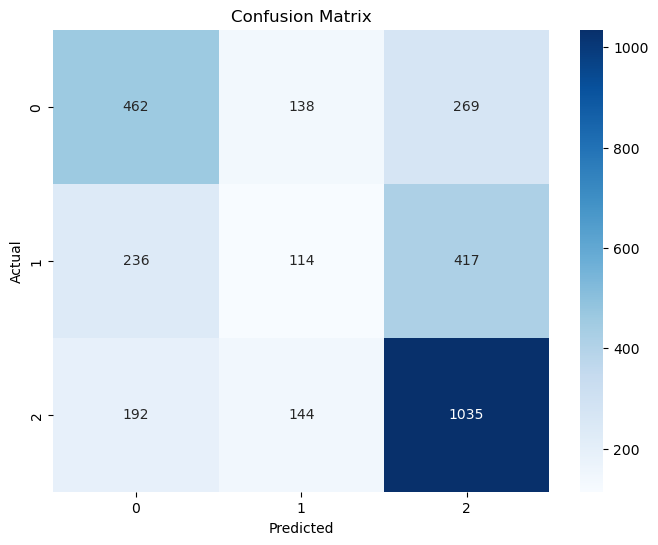

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cnf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
